In [1]:
import time
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Measure Runtime for both options: 'scatter' and 'convert'

In [2]:
def measure_runtime(command):
    start_time = time.time()
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    end_time = time.time()
    runtime = end_time - start_time
    return runtime, result.stdout, result.stderr

In [3]:
input_files = [
    ("../example_files/C1_fpkm.csv", "../example_files/C2_fpkm.csv"),
    ("../example_files/C2_fpkm.csv", "../example_files/C3_fpkm.csv"),
    ("../example_files/C3_fpkm.csv", "../example_files/C1_fpkm.csv"),
    ("../example_files/T1_fpkm.csv", "../example_files/T2_fpkm.csv"),
    ("../example_files/T2_fpkm.csv", "../example_files/T3_fpkm.csv"),
    ("../example_files/T3_fpkm.csv", "../example_files/T1_fpkm.csv")
]

In [4]:
commands = {
    "convert": "quantgene convert {file1} ./output",
    "scatter": "quantgene scatter {file1} {file2} ./output"
}

In [5]:
def calculate_average_runtime(commands, file_pairs, mode):
    runtimes = []
    output_files = []
    
    for file1, file2 in file_pairs:
        if mode == "convert":
            output_file = os.path.basename(file1).replace('_fpkm.csv', '_fpkm_converted.csv')
            output_files.append(output_file)
            command = commands[mode].format(file1=file1)
            print(f"Measuring runtime for converting file: {file1}")
        elif mode == "scatter":
            file1 = os.path.join('./output',os.path.basename(file1).replace('_fpkm.csv', '_fpkm_converted.csv'))
            file2 = os.path.join('./output',os.path.basename(file2).replace('_fpkm.csv', '_fpkm_converted.csv'))
            command = commands[mode].format(file1=file1, file2=file2)
            print(f"Measuring runtime for files: {file1}, {file2}")
        else:
            continue
        
        runtime, stdout, stderr = measure_runtime(command)
        if stderr:
            print(f"Errors for files {file1}, {file2}:\n{stderr}")
        else:
            runtimes.append(runtime)
    
    average_runtime = np.mean(runtimes)
    return average_runtime, runtimes, output_files

In [6]:
# First, run the convert step
convert_average_runtimes = {}
convert_all_runtimes = {}
print("Calculating average runtime for convert...")
convert_avg_runtime, convert_runtimes, output_files = calculate_average_runtime(commands, input_files, "convert")
convert_average_runtimes["convert"] = convert_avg_runtime
convert_all_runtimes["convert"] = convert_runtimes
print(f"Average runtime for convert: {convert_avg_runtime:.2f} seconds")

Calculating average runtime for convert...
Measuring runtime for converting file: ../example_files/C1_fpkm.csv
Measuring runtime for converting file: ../example_files/C2_fpkm.csv
Measuring runtime for converting file: ../example_files/C3_fpkm.csv
Measuring runtime for converting file: ../example_files/T1_fpkm.csv
Measuring runtime for converting file: ../example_files/T2_fpkm.csv
Measuring runtime for converting file: ../example_files/T3_fpkm.csv
Average runtime for convert: 0.58 seconds


In [ ]:
scatter_input_files = [
    ("./output/C1_fpkm_converted.csv", "./output/C2_fpkm_converted.csv"),
    ("./output/C2_fpkm_converted.csv", "./output/C3_fpkm_converted.csv"),
    ("./output/C1_fpkm_converted.csv", "./output/C3_fpkm_converted.csv"),
    ("./output/T1_fpkm_converted.csv", "./output/T2_fpkm_converted.csv"),
    ("./output/T2_fpkm_converted.csv", "./output/T3_fpkm_converted.csv"),
    ("./output/T1_fpkm_converted.csv", "./output/T3_fpkm_converted.csv")
]

In [7]:
# Now, run the scatter step using the converted files
scatter_average_runtimes = {}
scatter_all_runtimes = {}
print("Calculating average runtime for scatter...")
scatter_avg_runtime, scatter_runtimes, _ = calculate_average_runtime(commands, scatter_input_files, "scatter")
scatter_average_runtimes["scatter_plot"] = scatter_avg_runtime
scatter_all_runtimes["scatter_plot"] = scatter_runtimes
print(f"Average runtime for scatter_plot: {scatter_avg_runtime:.2f} seconds")

# Combine both average runtimes
average_runtimes = {**scatter_average_runtimes, **convert_average_runtimes}

Calculating average runtime for scatter...
Measuring runtime for files: ./output/C1_fpkm_converted.csv, ./output/C2_fpkm_converted.csv
Measuring runtime for files: ./output/C3_fpkm_converted.csv, ./output/T1_fpkm_converted.csv
Measuring runtime for files: ./output/T2_fpkm_converted.csv, ./output/T3_fpkm_converted.csv
Average runtime for scatter_plot: 1.15 seconds


## Get the Average Runtime 

In [8]:
# Get the Average Runtime
average_runtime_df = pd.DataFrame(list(average_runtimes.items()), columns=['Task', 'Average Runtime'])

## Visualize the Average Runtime in both options (s)

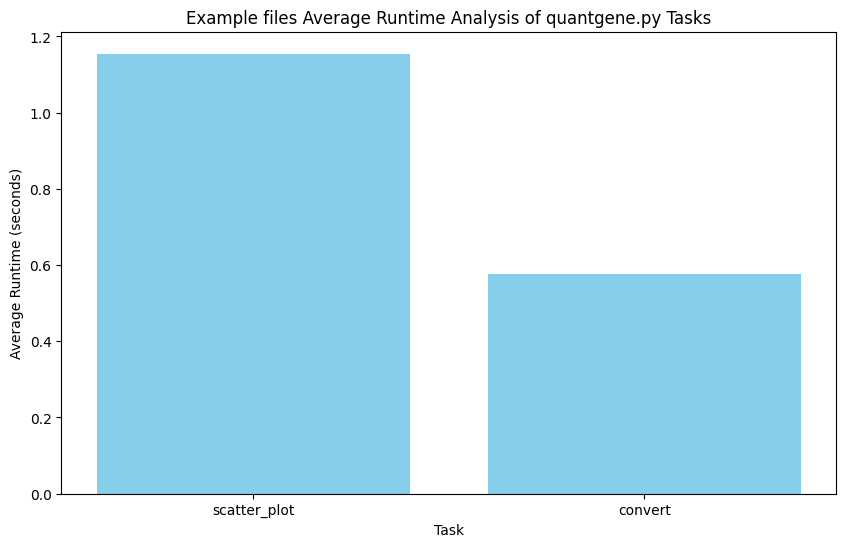

In [9]:
# Visualize the Average Runtime in both options (s)
plt.figure(figsize=(10, 6))
plt.bar(average_runtime_df['Task'], average_runtime_df['Average Runtime'], color='skyblue')
plt.xlabel('Task')
plt.ylabel('Average Runtime (seconds)')
plt.title('Example files Average Runtime Analysis of quantgene.py Tasks')

# Save the plot as a PNG file
plt.savefig('ex_avg_runtime_analysis.png')

plt.show()

### Get Dataframe of Average Runtime 

In [10]:
# Get Dataframe of Average Runtime
average_runtime_df

,Task,Average Runtime
0,scatter_plot,1.154649
1,convert,0.575599
